In [2]:
from skimage.io import imread
from matplotlib import pyplot as plt
from os.path import join
import numpy as np
from PIL.ImageOps import fit
from PIL import Image

%matplotlib inline

In [17]:
inDirAtt ='/Users/tonicreswell/Downloads/list_attr_celeba.txt'
inDirIm='/Users/tonicreswell/Downloads/img_align_celeba'
IMSIZE=64

In [ ]:
f = open(inDirAtt)
noSamples = int(f.readline())
print 'There are %d samples' % noSamples
labels = f.readline().split(' ')
print labels, type(labels)
smileIdx = labels.index('Smiling')
print 'Smile index:', smileIdx
dataX = []
dataY = []
for i, line in enumerate(f):
    imName, labels = line.split(' ')[0], line.split(' ')[1:]
    label = np.loadtxt(labels)
    print imName, label
    
    print i
    im = imread(join(inDirIm, imName))
    im = Image.fromarray(im)
    im = fit(im, size=(IMSIZE,IMSIZE))
    label = label.astype('int')
    im = np.transpose(im, (2,0,1))
    dataX.append(im)
    dataY.append(label)




In [39]:
print np.shape(dataX)
print np.shape(dataY)

np.save('../InData/celebA/xTrain.npy', np.asarray(dataX))
np.save('../InData/celebA/yAllTrain.npy', np.asarray(dataY))


(2002, 3, 64, 64)
(2002, 40)


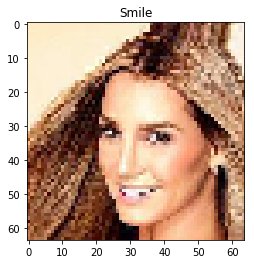

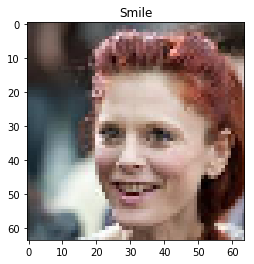

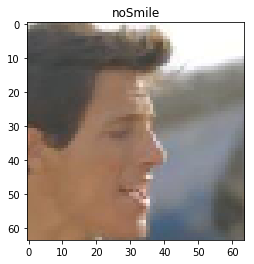

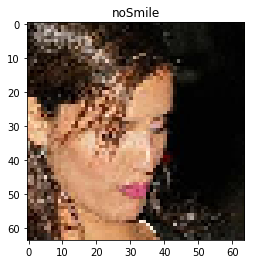

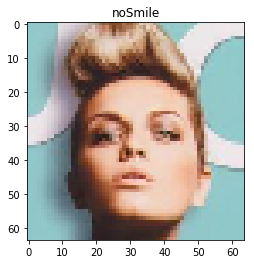

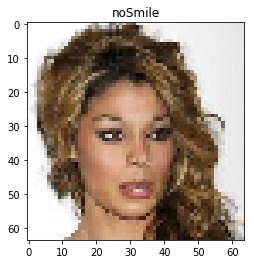

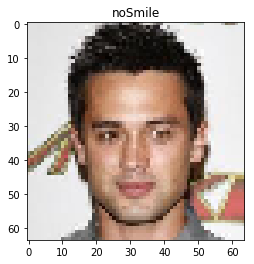

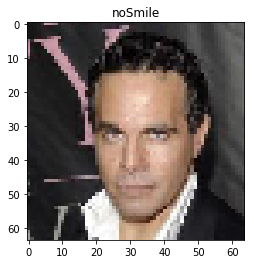

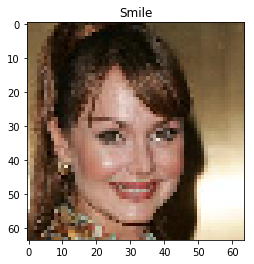

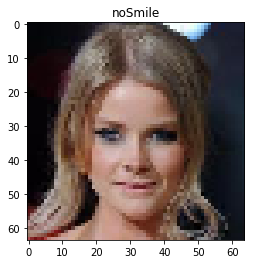

In [38]:
labels=['noSmile', '', 'Smile']
for i in range(10):
    plt.figure()
    plt.title(labels[dataY[i, smileIdx]+1])
    plt.imshow(dataX[i].transpose(1,2,0))
    dataY = np.asarray(dataY)
    dataX = np.asarray(dataX)
